# **1D Assignement: Signal Processing**

In [13]:
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram, welch

In [14]:
def load_ecg_data(filepath):
    data = arff.loadarff(filepath)
    df = pd.DataFrame(data[0])
    return df

## *1. Loading the dataset*

In [15]:
train_df = load_ecg_data('data/ECG5000_TRAIN.arff')
test_df = load_ecg_data('data/ECG5000_TEST.arff')
# Combine train and test data
ecg_df = pd.concat([train_df, test_df], axis=0)

In [16]:
# The last column is the target (class labels)
# Convert from bytes to string if needed
if isinstance(ecg_df.iloc[0, -1], bytes):
    ecg_df.iloc[:, -1] = ecg_df.iloc[:, -1].str.decode('utf-8')

print(f"Dataset shape: {ecg_df.shape}")
print(f"Class distribution:\n{ecg_df.iloc[:, -1].value_counts()}")

Dataset shape: (5000, 141)
Class distribution:
target
1    2919
2    1767
4     194
3      96
5      24
Name: count, dtype: int64


## *Time Domain Visualization*

In [17]:
def plot_ecg_time_domain(df, class_name, num_samples=5, normalize=True):
    # Filter by class
    class_data = df[df.iloc[:, -1] == class_name].iloc[:, :-1]

    plt.figure(figsize=(12, 6))

    # Plot multiple samples from this class
    for i in range(min(num_samples, len(class_data))):
        signal = class_data.iloc[i, :].values
        if normalize:
            signal = (signal - np.mean(signal)) / np.std(signal)
        plt.plot(signal, label=f'Sample {i+1}')

    plt.title(f'ECG Signals - Class {class_name}', fontsize=14)
    plt.xlabel('Time (samples)', fontsize=12)
    plt.ylabel('Amplitude (normalized)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

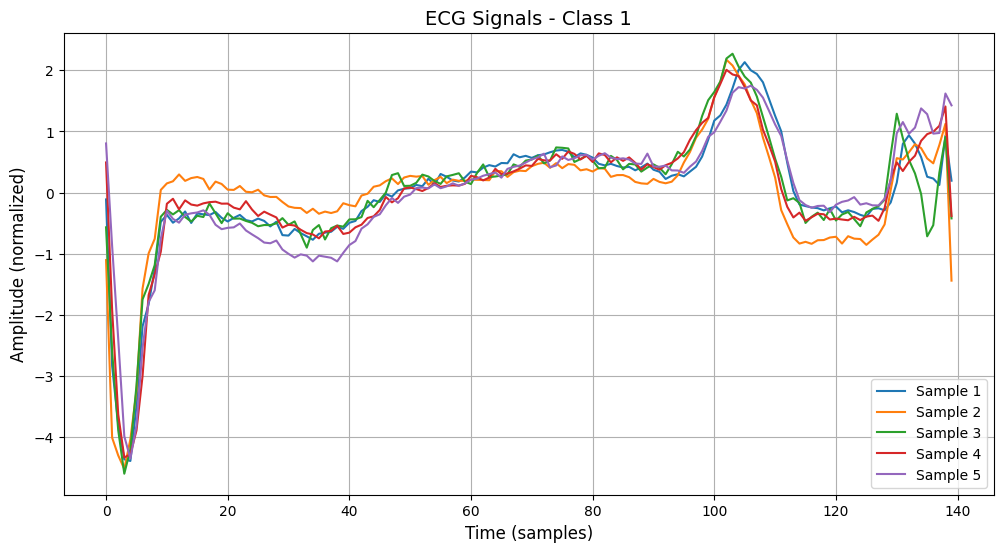

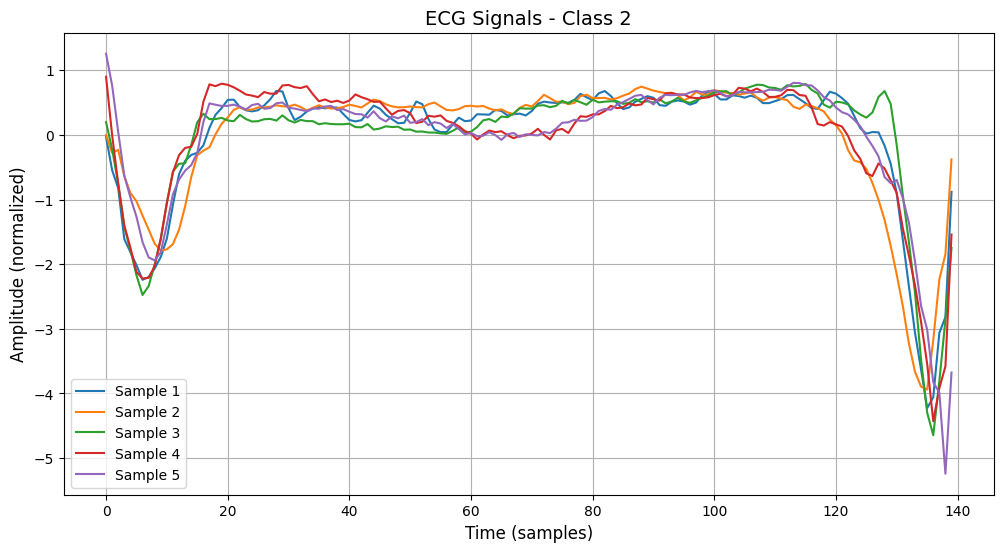

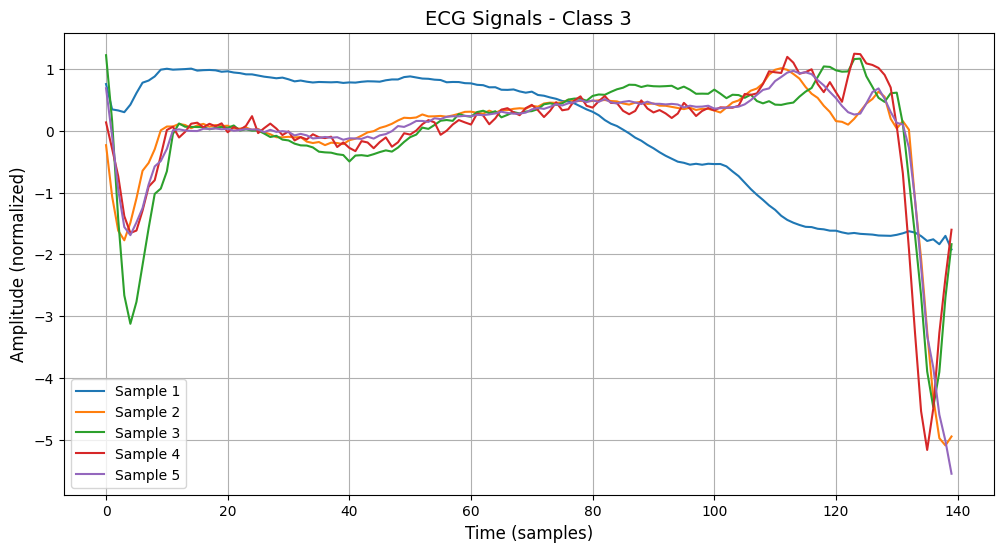

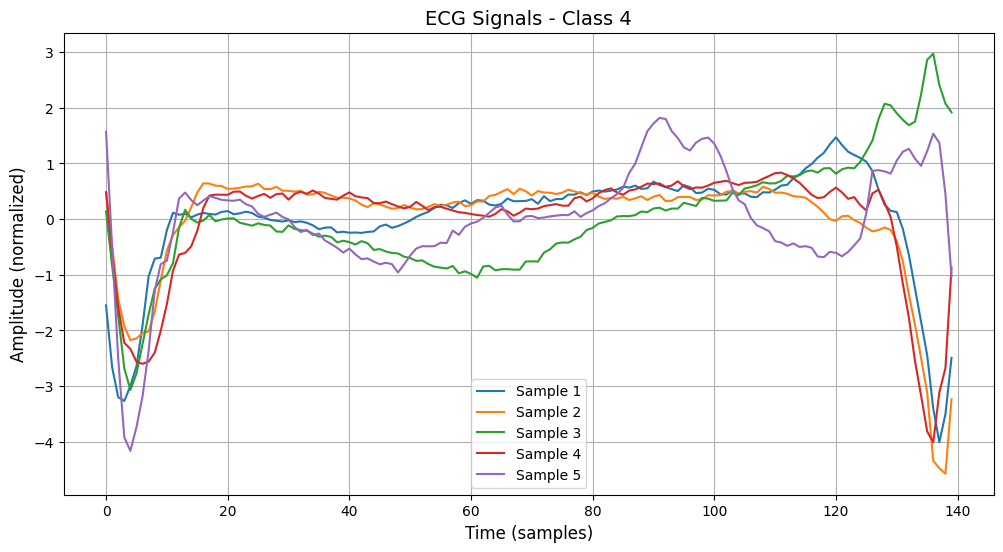

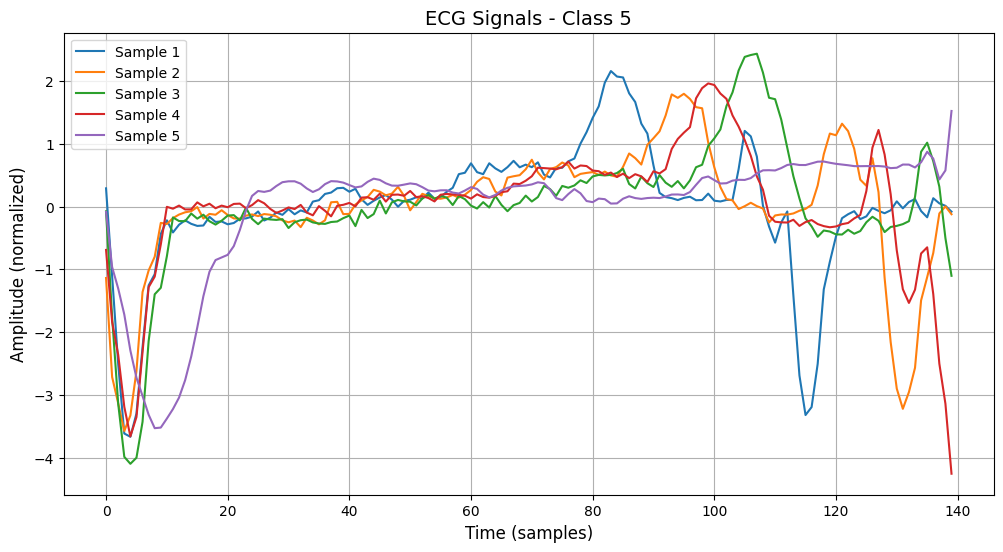

In [19]:

# Get unique classes
classes = ecg_df.iloc[:, -1].unique()

# Plot for each class
for cls in classes:
    plot_ecg_time_domain(ecg_df, cls)

## *Concatenated Heartbeats Visualization*

In [20]:
def plot_concatenated_heartbeats(df, samples_per_class=5):
    plt.figure(figsize=(15, 8))

    for i, cls in enumerate(classes):
        # Get samples for this class
        class_data = df[df.iloc[:, -1] == cls].iloc[:, :-1]

        # Select random samples
        samples = class_data.sample(
            min(samples_per_class, len(class_data)), random_state=42)

        # Concatenate and normalize
        concatenated = np.concatenate(samples.values)
        concatenated = (concatenated - np.mean(concatenated)) / \
            np.std(concatenated)

        # Plot
        plt.plot(concatenated, label=f'Class {cls}')

    plt.title('Concatenated ECG Heartbeats by Class', fontsize=16)
    plt.xlabel('Time (samples)', fontsize=14)
    plt.ylabel('Normalized Amplitude', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

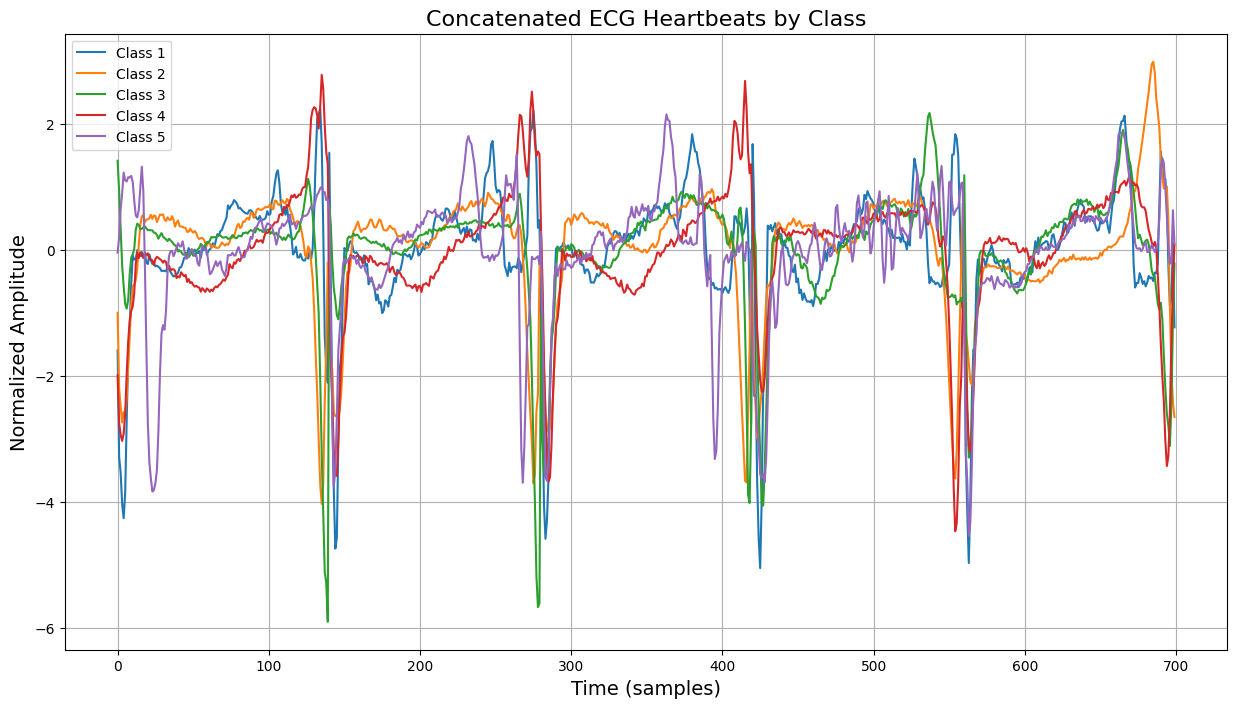

In [21]:
plot_concatenated_heartbeats(ecg_df)

## *Frequency Domain-Analysis*

In [22]:
def plot_frequency_domain(df, class_name, sample_num=0, fs=500):
    # Get a sample from the specified class
    class_data = df[df.iloc[:, -1] == class_name].iloc[:, :-1]
    signal = class_data.iloc[sample_num, :].values

    # Normalize
    signal = (signal - np.mean(signal)) / np.std(signal)

    # Compute FFT
    n = len(signal)
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]

    # Plot time and frequency domains
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.plot(signal)
    plt.title(f'Time Domain - Class {class_name}', fontsize=14)
    plt.xlabel('Time (samples)', fontsize=12)
    plt.ylabel('Amplitude', fontsize=12)
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(xf, 2/n * np.abs(yf[:n//2]))
    plt.title(f'Frequency Domain - Class {class_name}', fontsize=14)
    plt.xlabel('Frequency (Hz)', fontsize=12)
    plt.ylabel('Magnitude', fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()



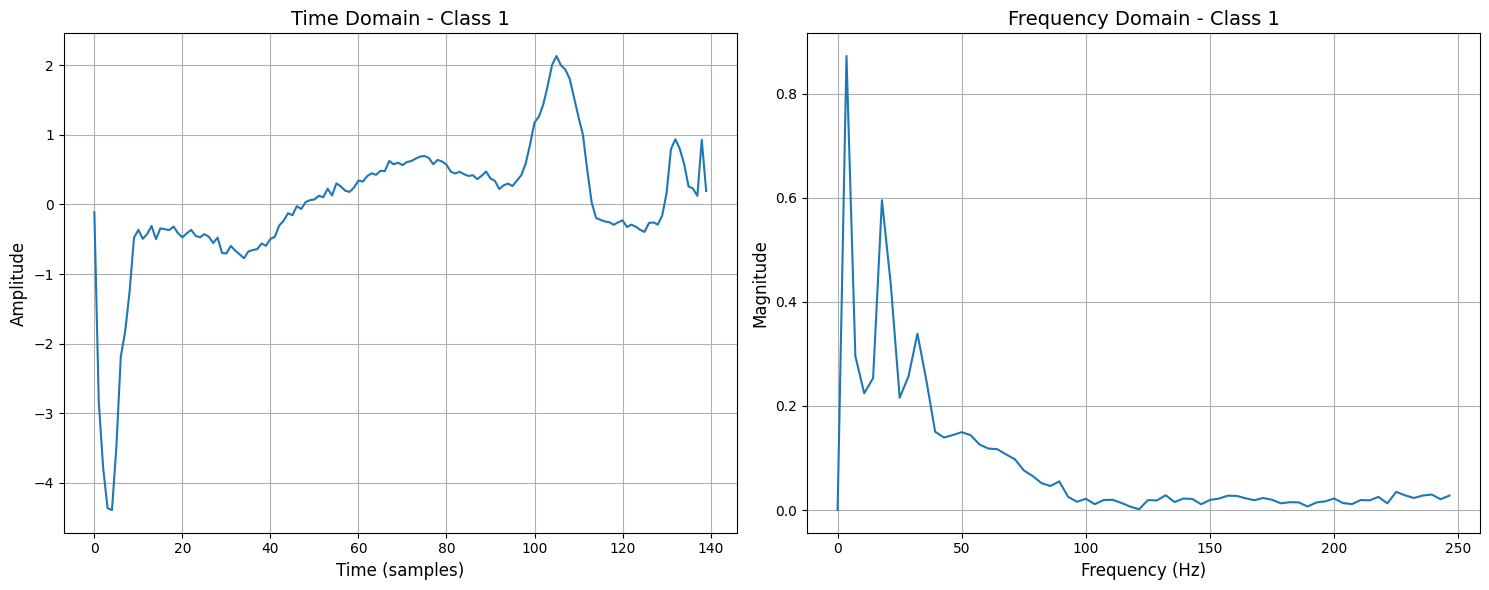

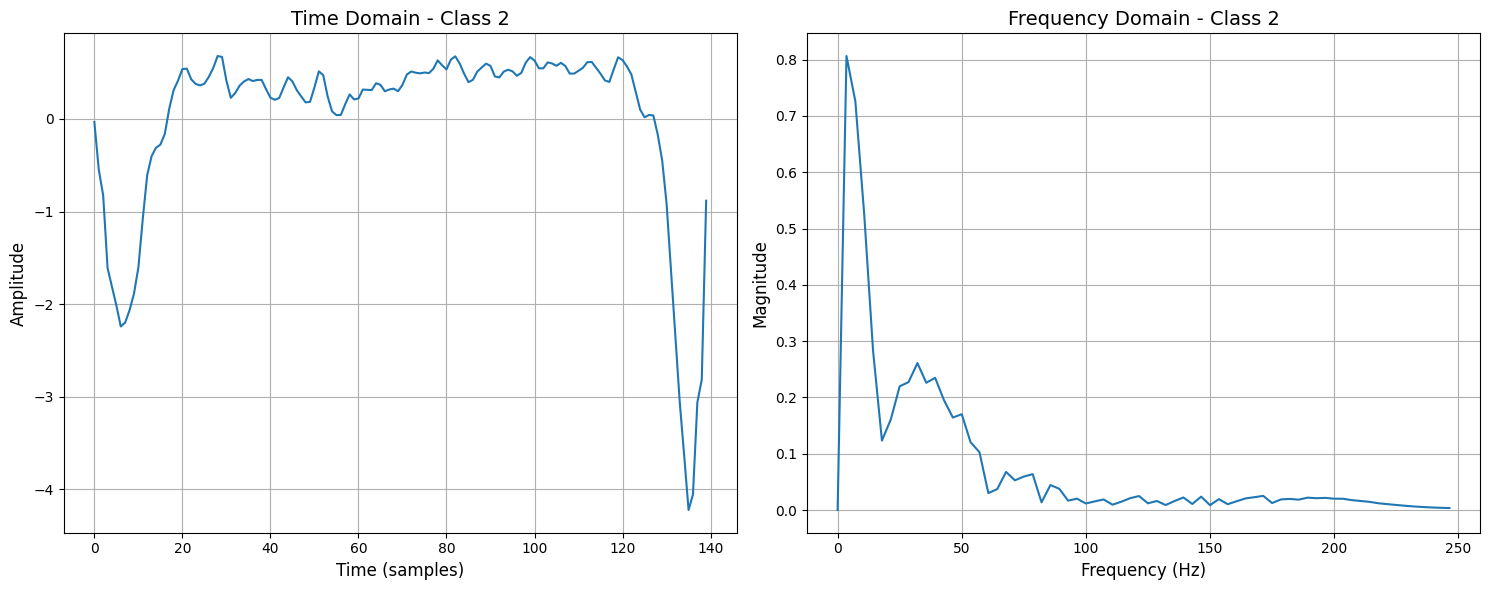

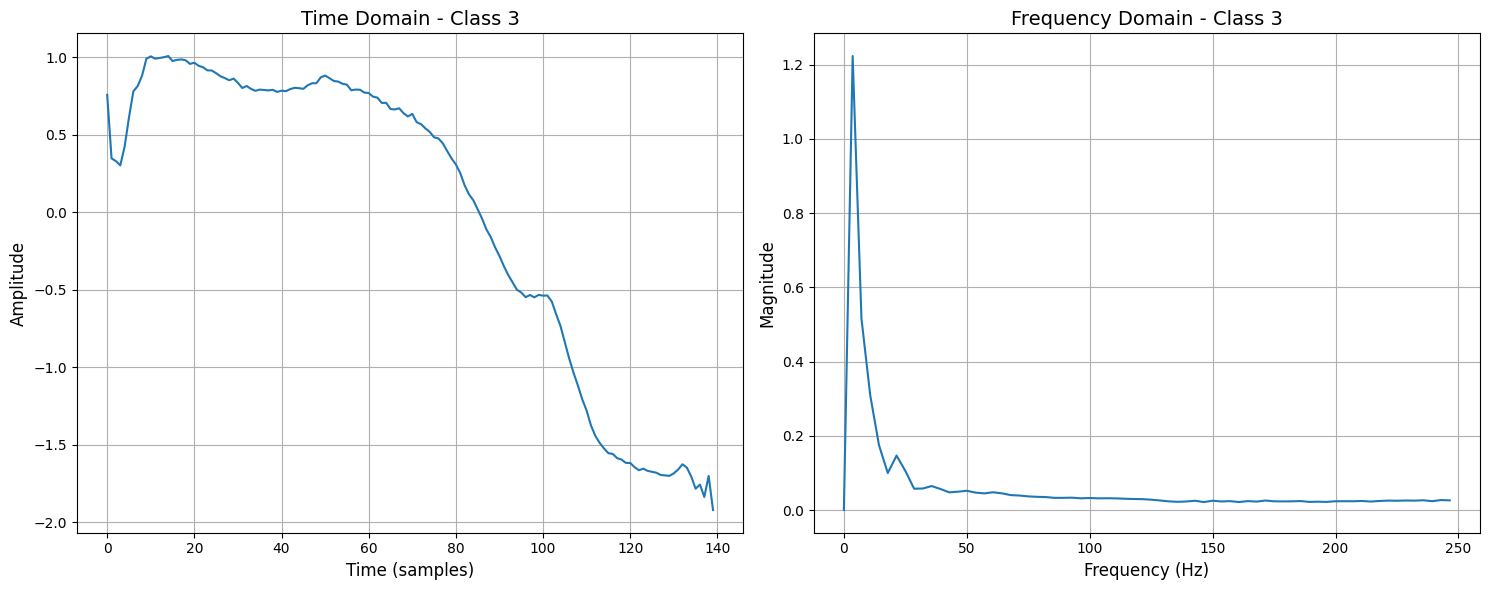

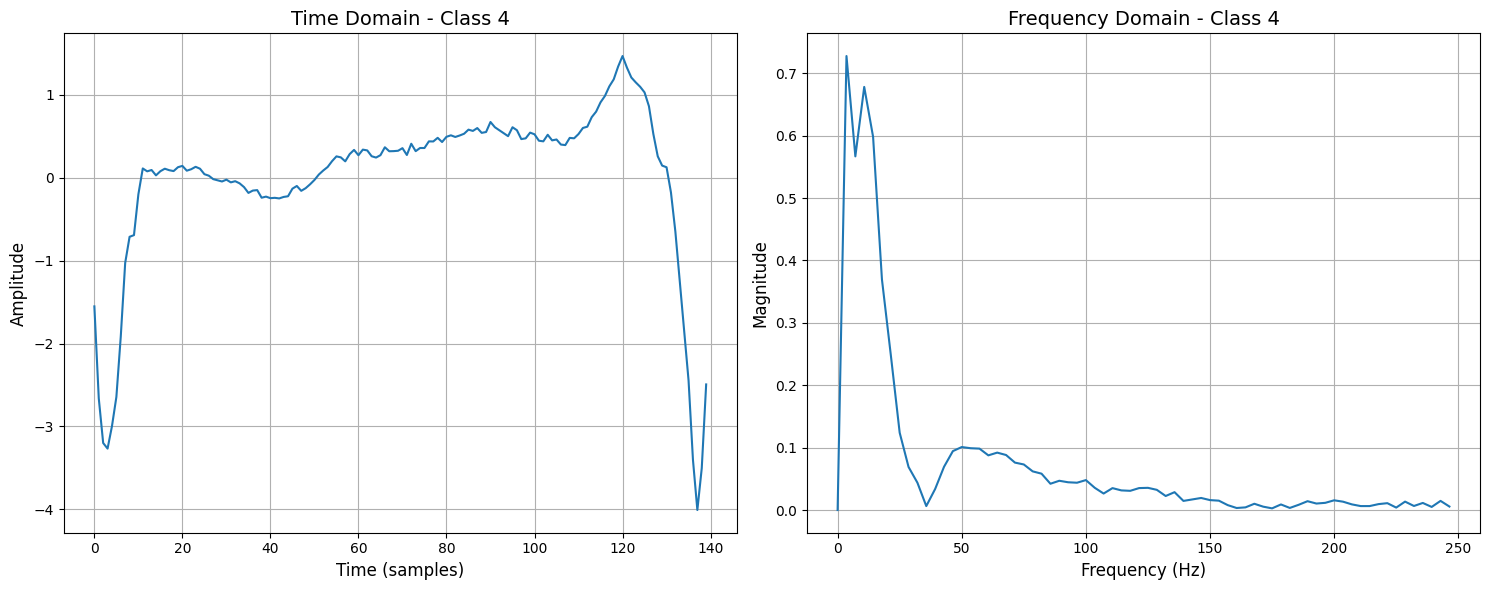

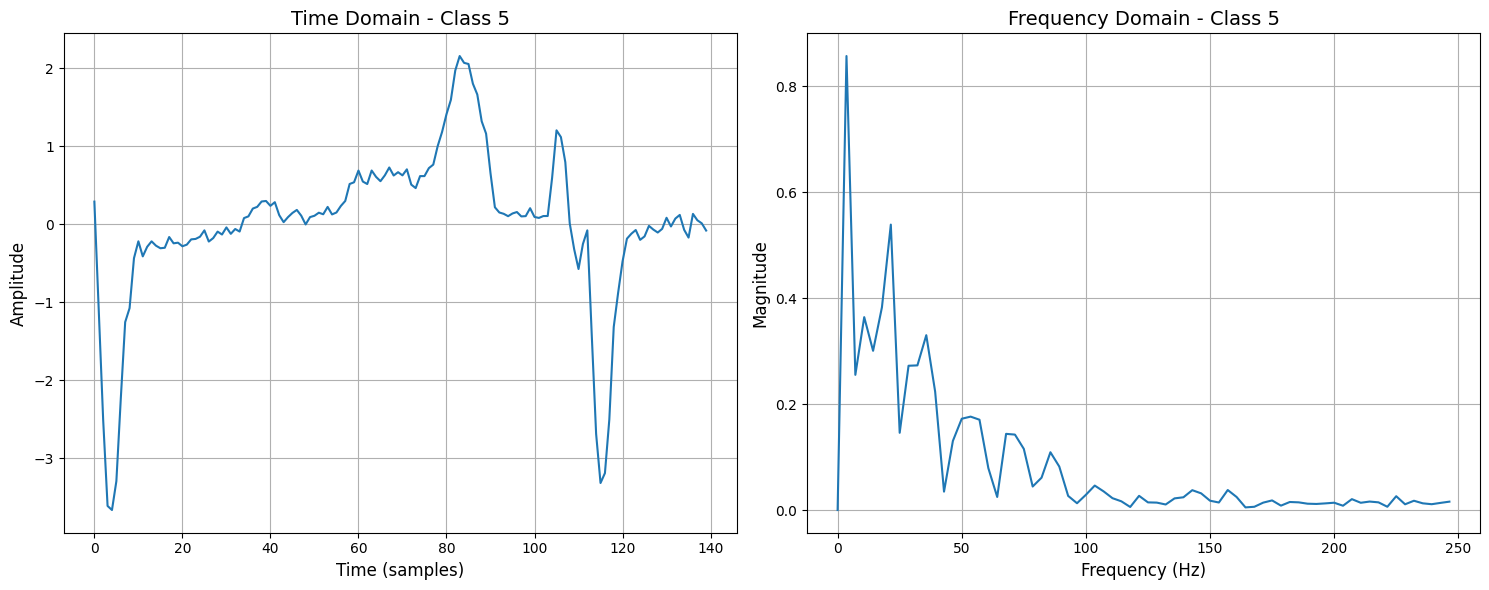

In [23]:

# Plot for each class
for cls in classes:
    plot_frequency_domain(ecg_df, cls)